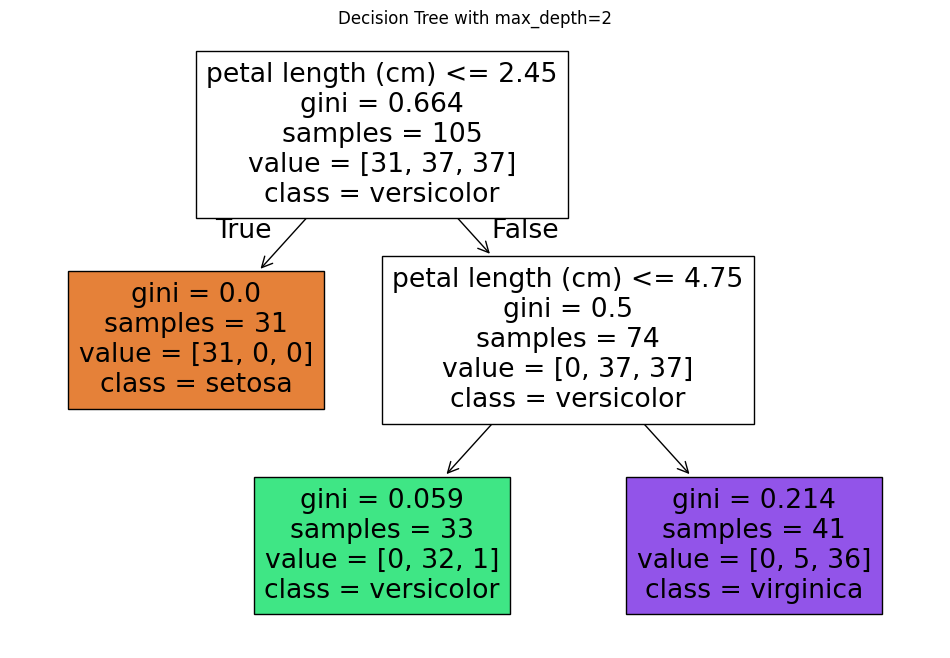

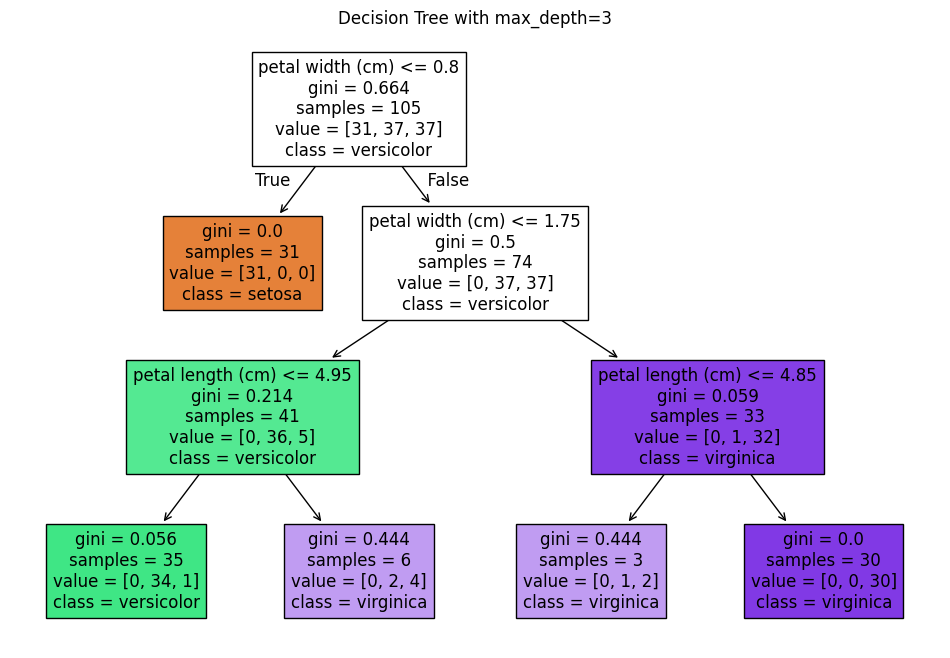

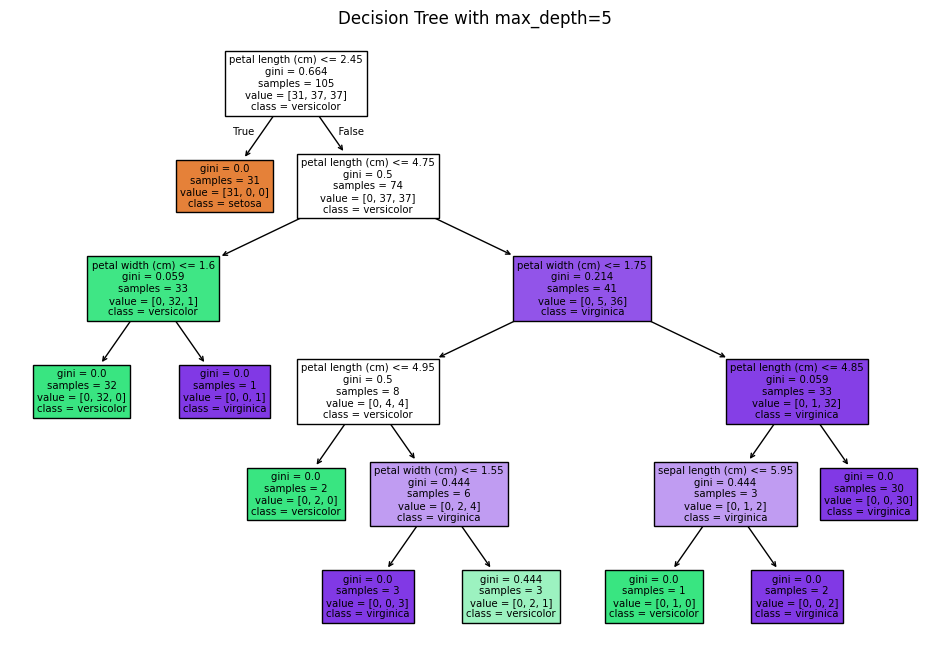

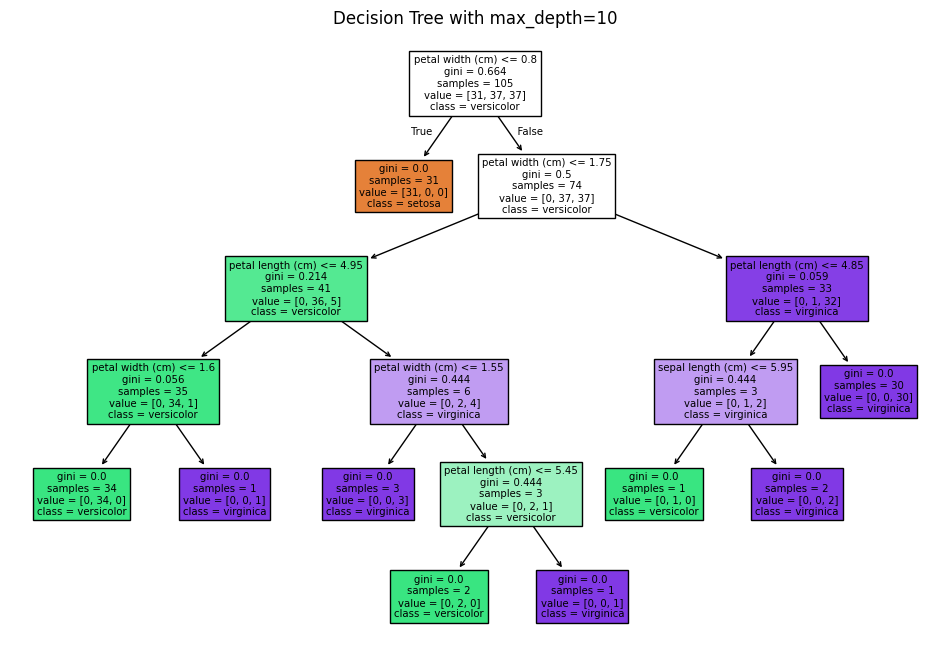

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Carregando o Iris Dataset
iris = load_iris()
X, y = iris.data, iris.target

# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Função para visualizar a árvore de decisão
def plot_decision_tree(max_depth):
    model = DecisionTreeClassifier(criterion='gini', max_depth=max_depth)
    model.fit(X_train, y_train)

    plt.figure(figsize=(12, 8))
    plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
    plt.title(f"Decision Tree with max_depth={max_depth}")
    plt.show()

# Gerando as árvores com diferentes max_depths
for depth in [2, 3, 5, 10]:
    plot_decision_tree(depth)

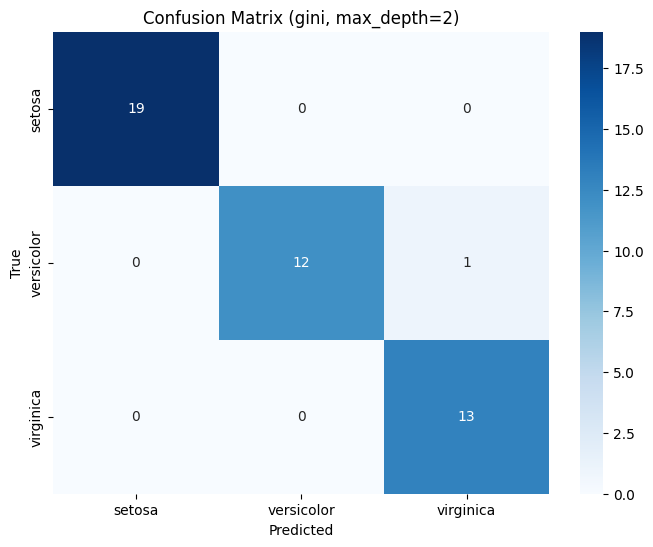

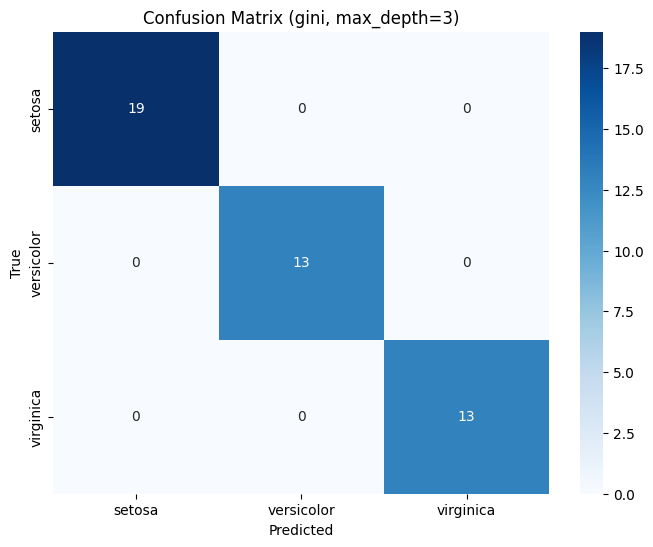

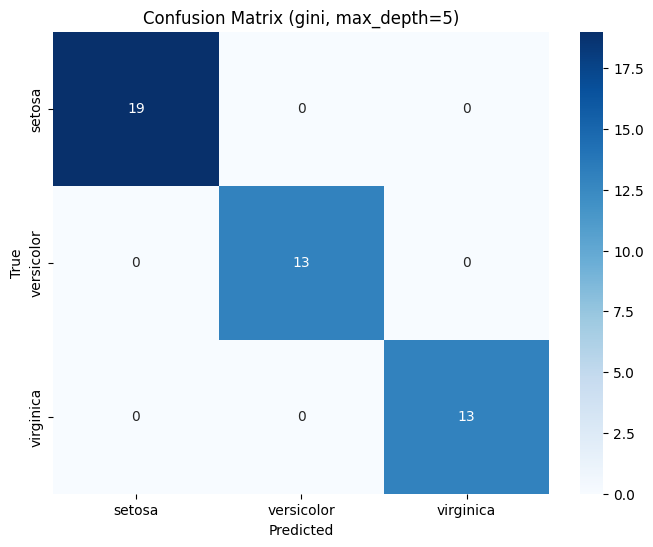

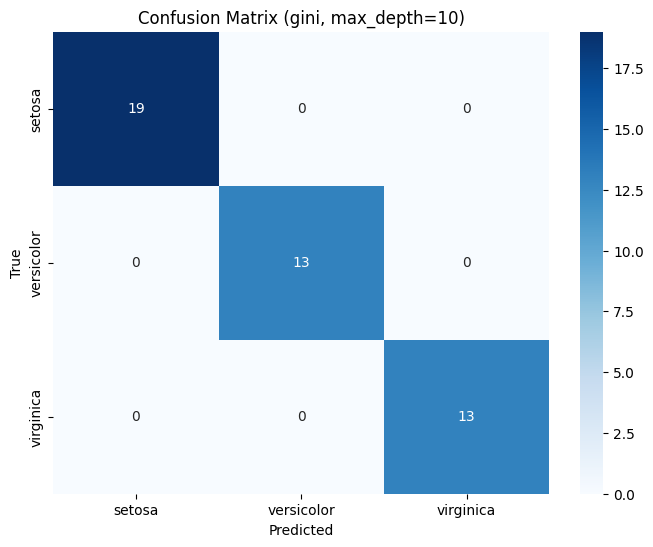

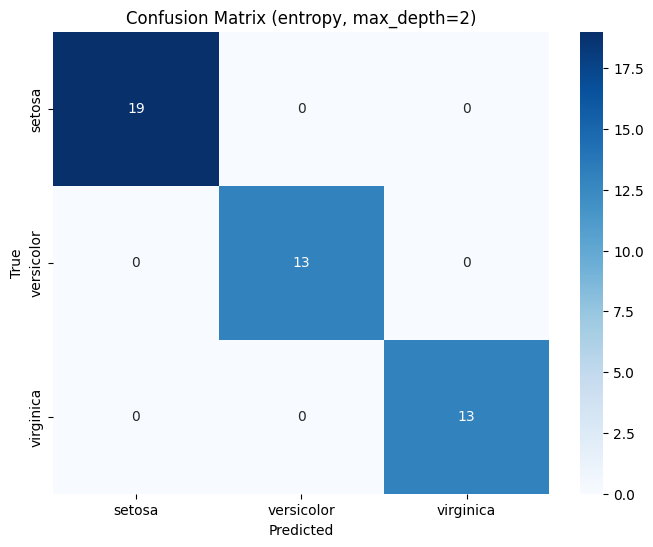

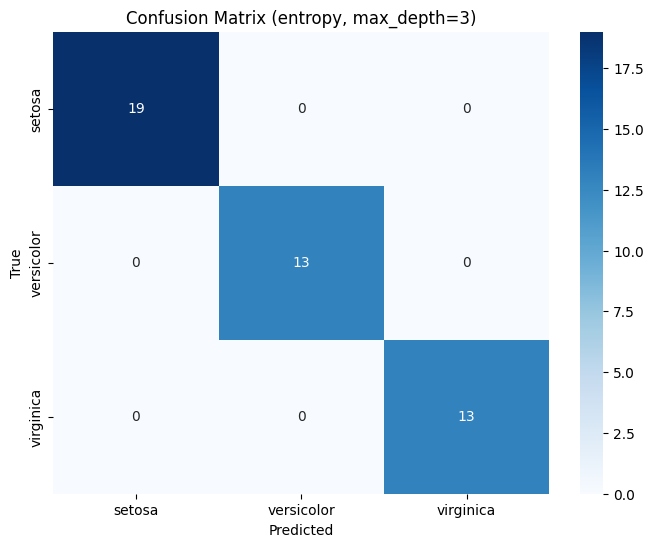

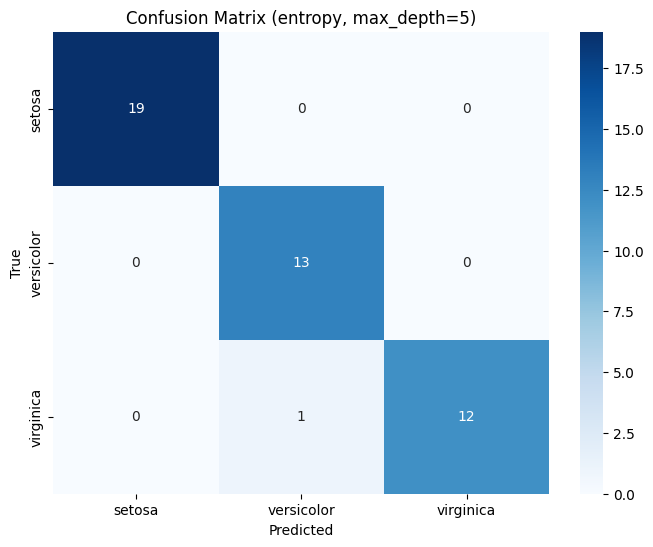

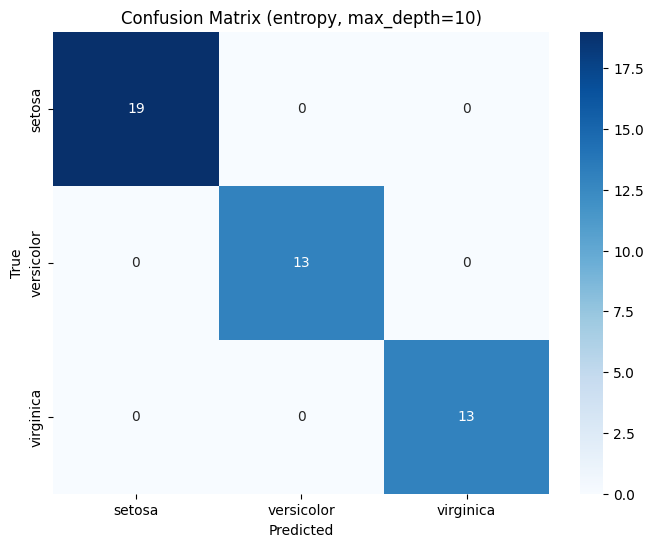

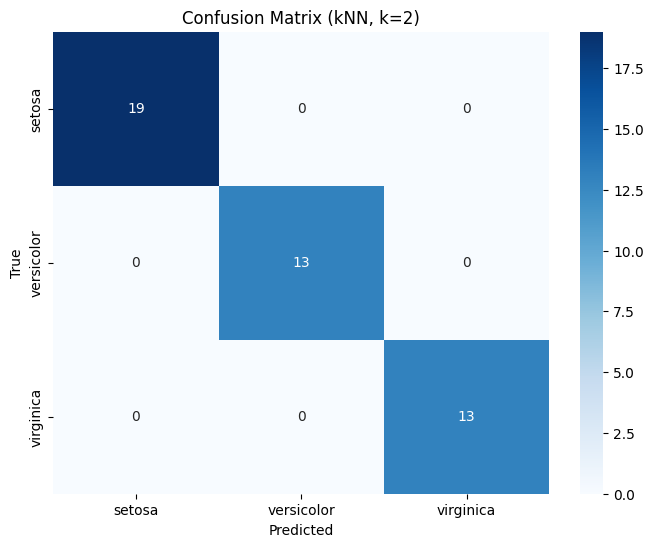

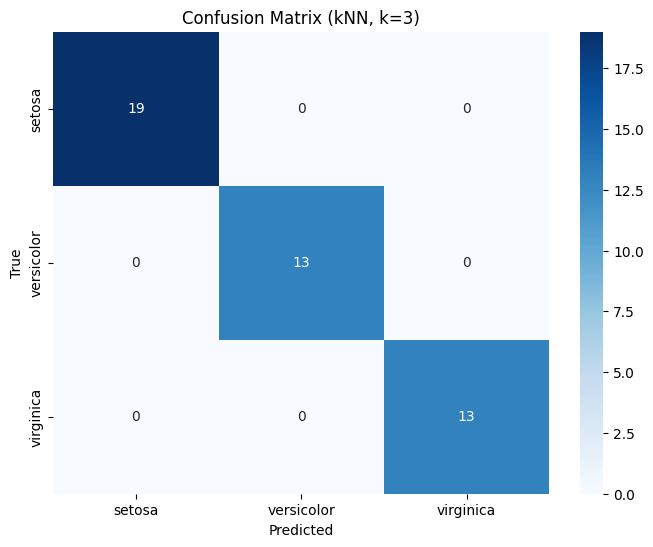

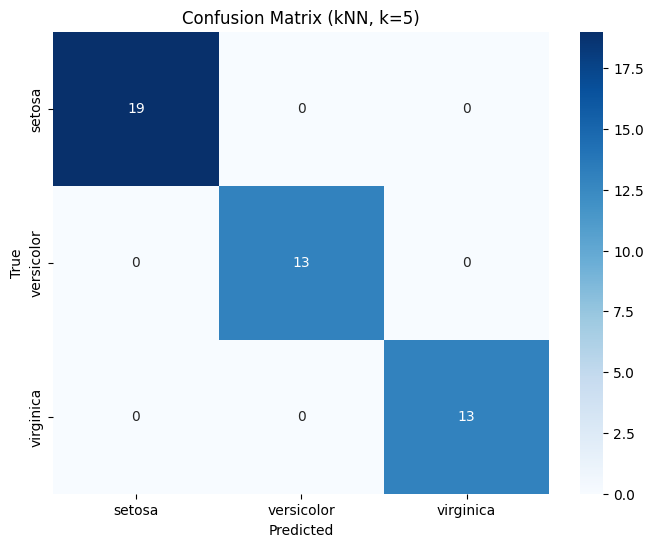

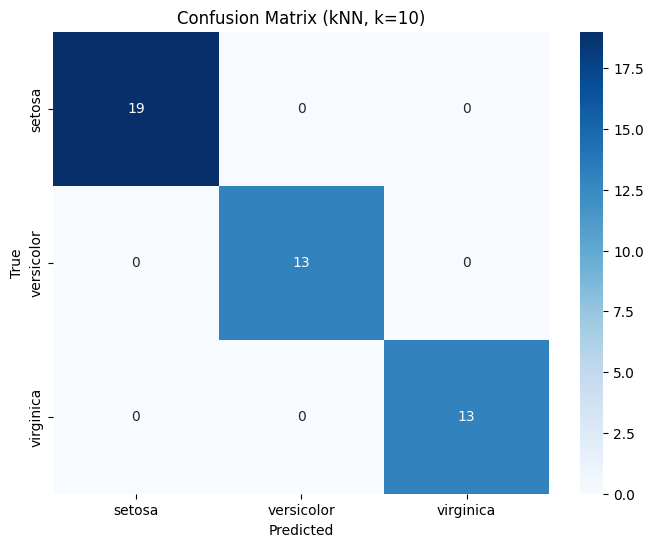

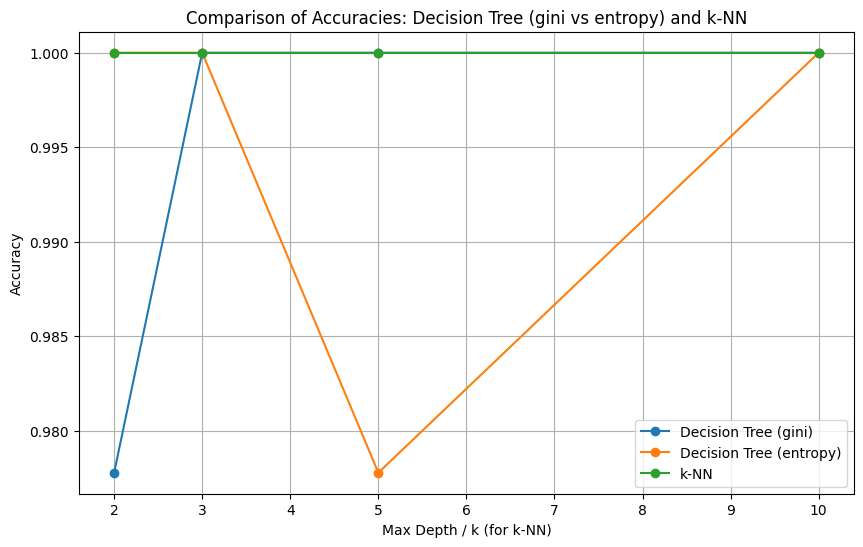

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Carregando o Iris Dataset
iris = load_iris()
X, y = iris.data, iris.target

# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Função para gerar a matriz de confusão e exibi-la como heatmap
def plot_confusion_heatmap(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Função para calcular acurácia e armazenar resultados
def model_accuracy(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Listas para armazenar resultados
depths = [2, 3, 5, 10]
accuracies_gini = []
accuracies_entropy = []
accuracies_knn = []

# Avaliando DecisionTreeClassifier com 'gini' para diferentes profundidades
for depth in depths:
    model_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    acc_gini = model_accuracy(model_gini, X_train, y_train, X_test, y_test)
    accuracies_gini.append(acc_gini)
    plot_confusion_heatmap(model_gini, X_test, y_test, f"Confusion Matrix (gini, max_depth={depth})")

# Avaliando DecisionTreeClassifier com 'entropy' para diferentes profundidades
for depth in depths:
    model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    acc_entropy = model_accuracy(model_entropy, X_train, y_train, X_test, y_test)
    accuracies_entropy.append(acc_entropy)
    plot_confusion_heatmap(model_entropy, X_test, y_test, f"Confusion Matrix (entropy, max_depth={depth})")

# Avaliando k-NN com diferentes valores de k
k_values = [2, 3, 5, 10]
for k in k_values:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    acc_knn = model_accuracy(model_knn, X_train, y_train, X_test, y_test)
    accuracies_knn.append(acc_knn)
    plot_confusion_heatmap(model_knn, X_test, y_test, f"Confusion Matrix (kNN, k={k})")

# Comparando acurácias em um gráfico
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies_gini, marker='o', label='Decision Tree (gini)')
plt.plot(depths, accuracies_entropy, marker='o', label='Decision Tree (entropy)')
plt.plot(k_values, accuracies_knn, marker='o', label='k-NN')
plt.title('Comparison of Accuracies: Decision Tree (gini vs entropy) and k-NN')
plt.xlabel('Max Depth / k (for k-NN)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

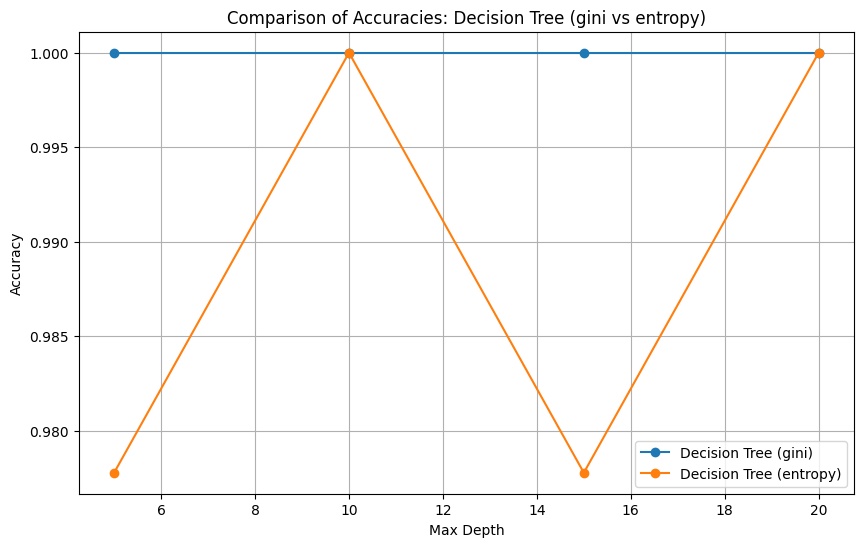

In [10]:
# Testando com profundidades maiores para ver diferenças mais claras
depths = [5, 10, 15, 20]

# Avaliando DecisionTreeClassifier com 'gini'
accuracies_gini = []
for depth in depths:
    model_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    acc_gini = model_accuracy(model_gini, X_train, y_train, X_test, y_test)
    accuracies_gini.append(acc_gini)

# Avaliando DecisionTreeClassifier com 'entropy'
accuracies_entropy = []
for depth in depths:
    model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    acc_entropy = model_accuracy(model_entropy, X_train, y_train, X_test, y_test)
    accuracies_entropy.append(acc_entropy)

# Comparando acurácias em um gráfico
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies_gini, marker='o', label='Decision Tree (gini)')
plt.plot(depths, accuracies_entropy, marker='o', label='Decision Tree (entropy)')
plt.title('Comparison of Accuracies: Decision Tree (gini vs entropy)')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

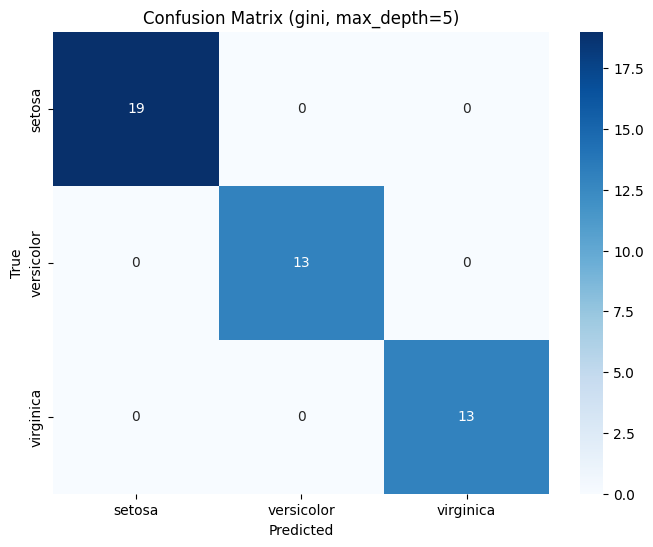

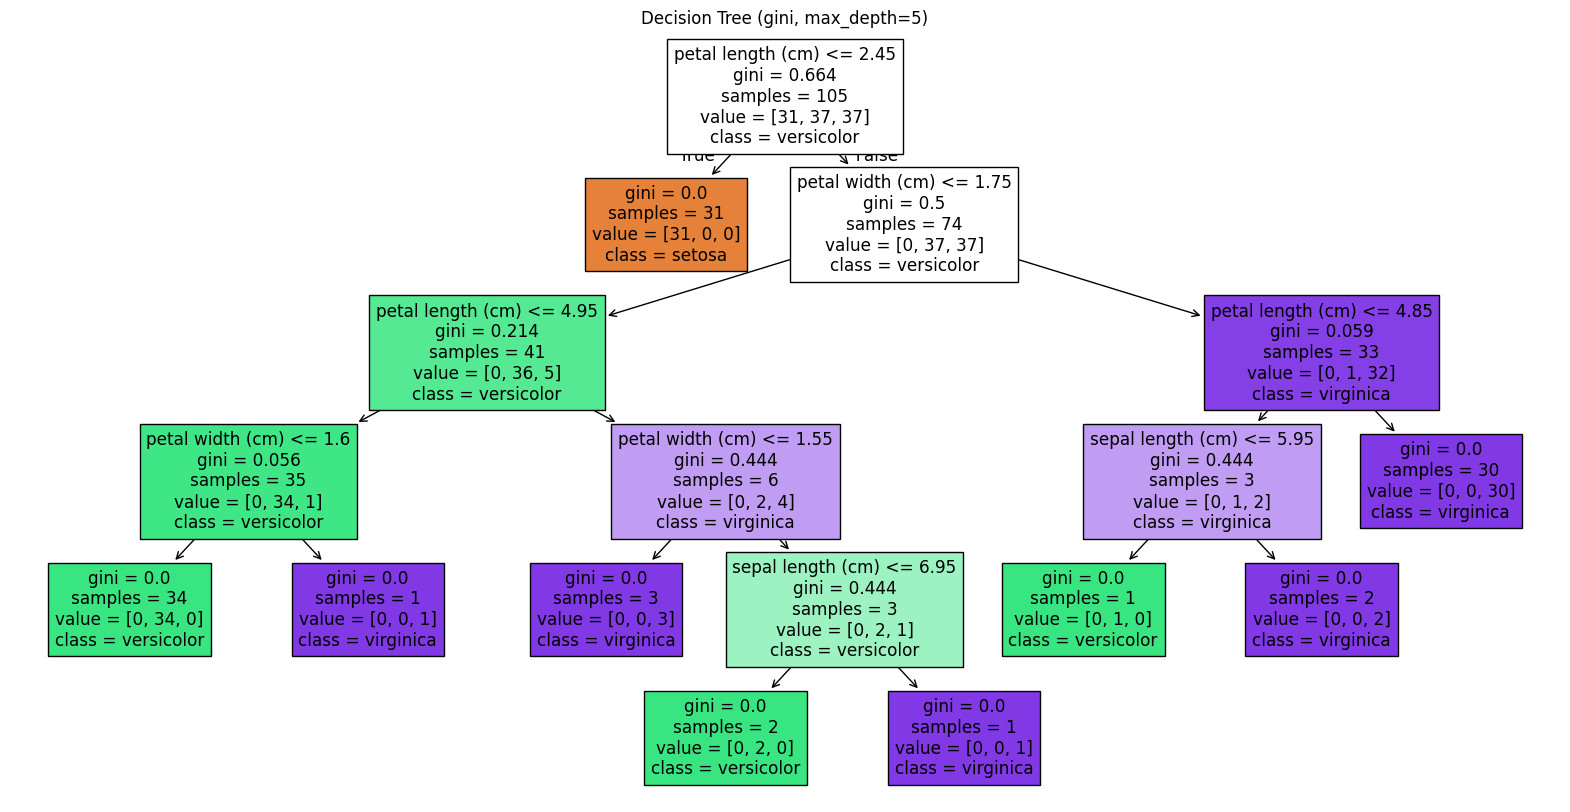

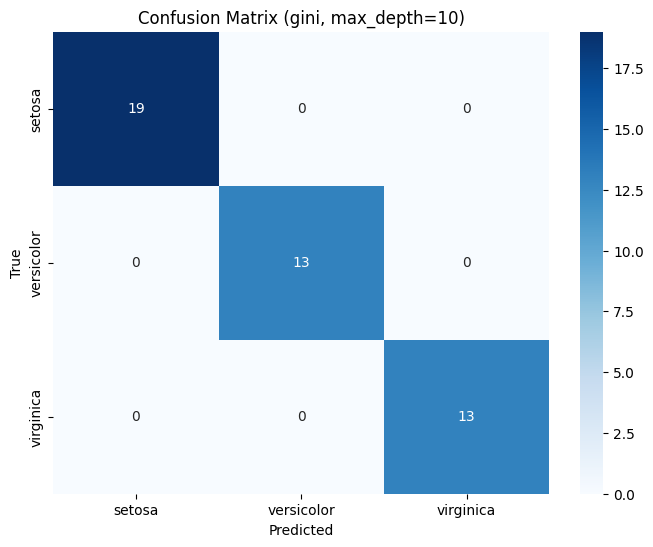

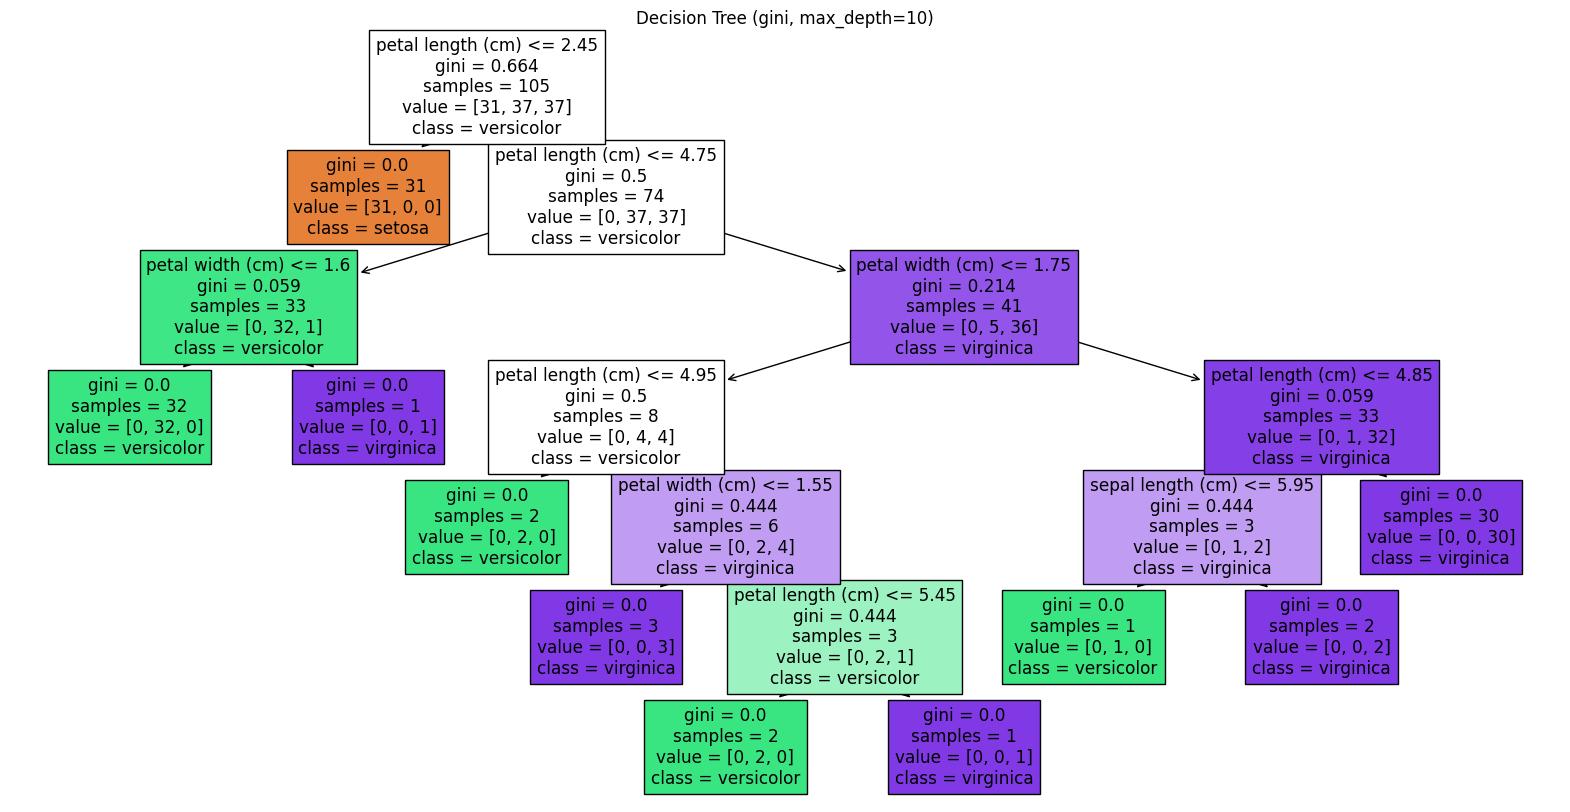

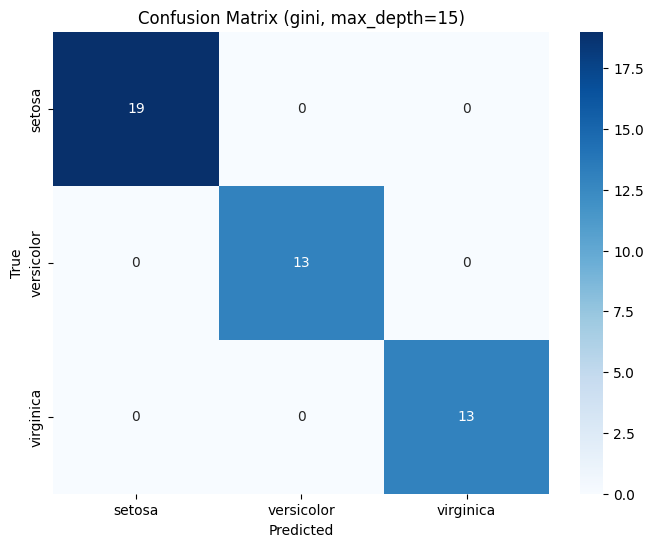

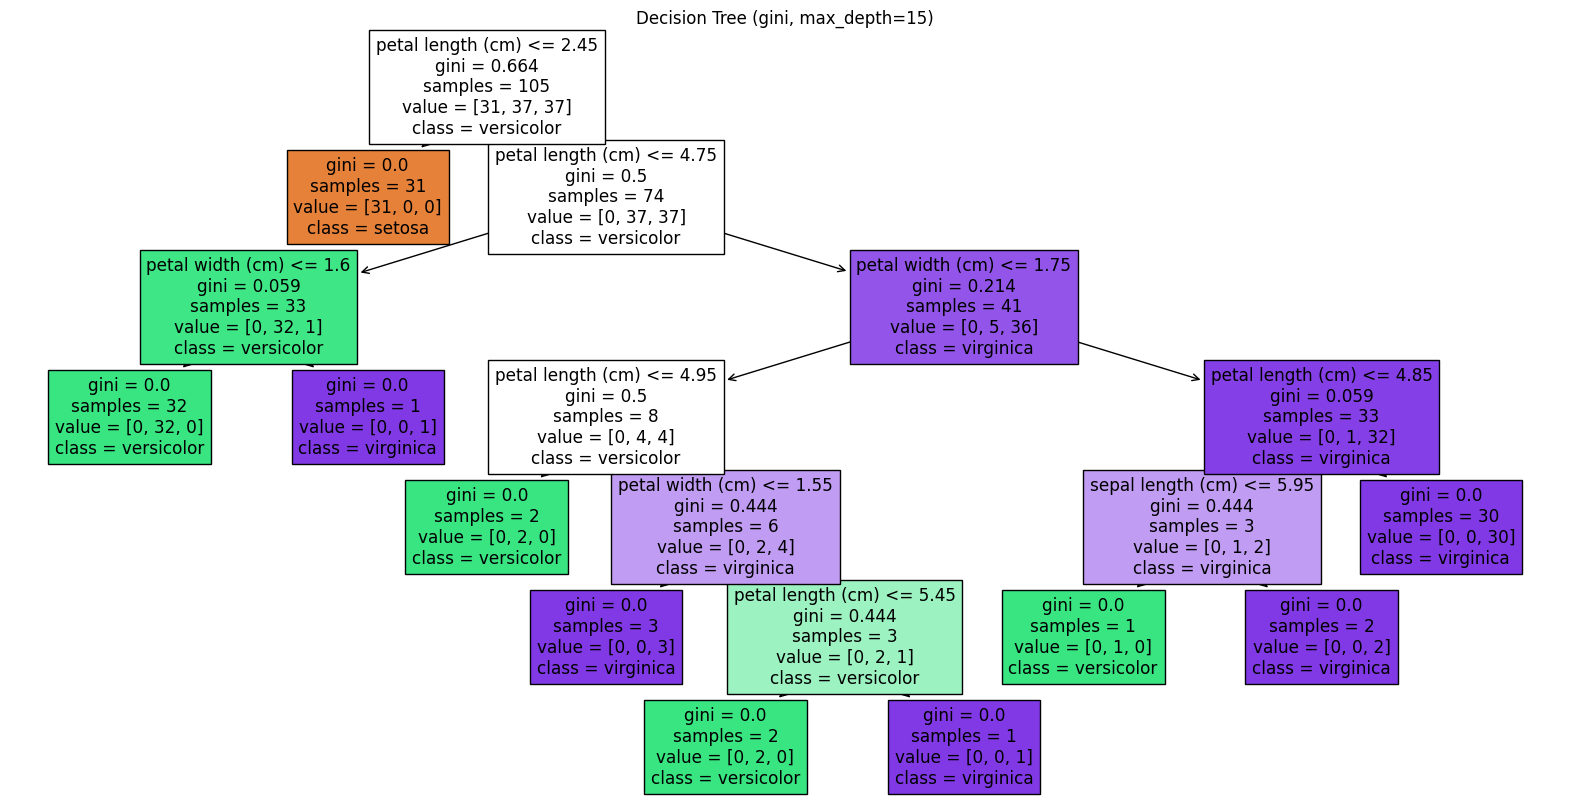

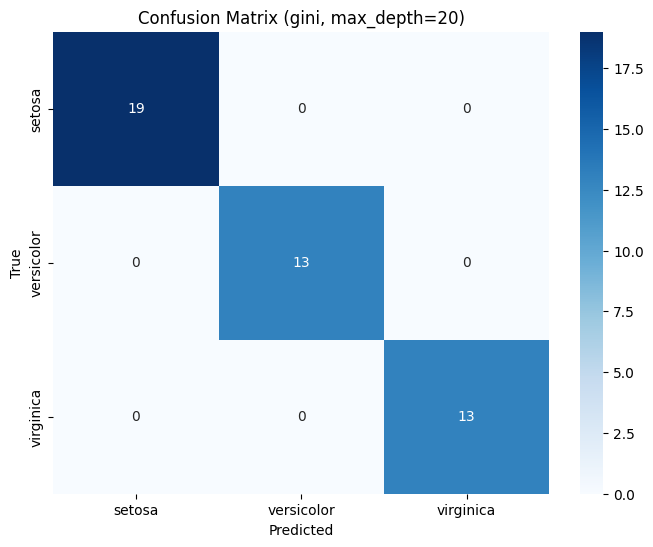

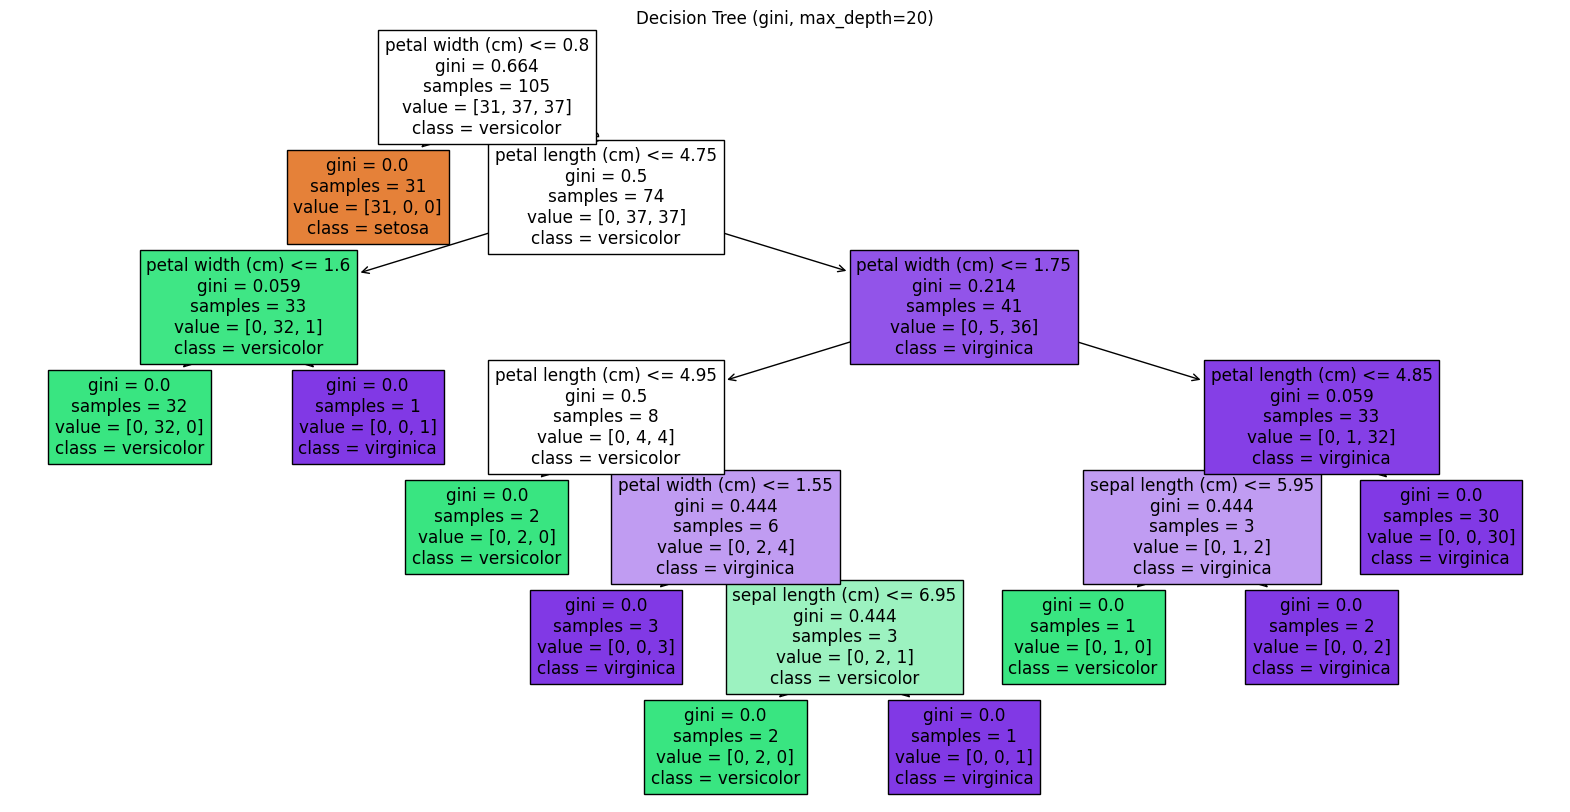

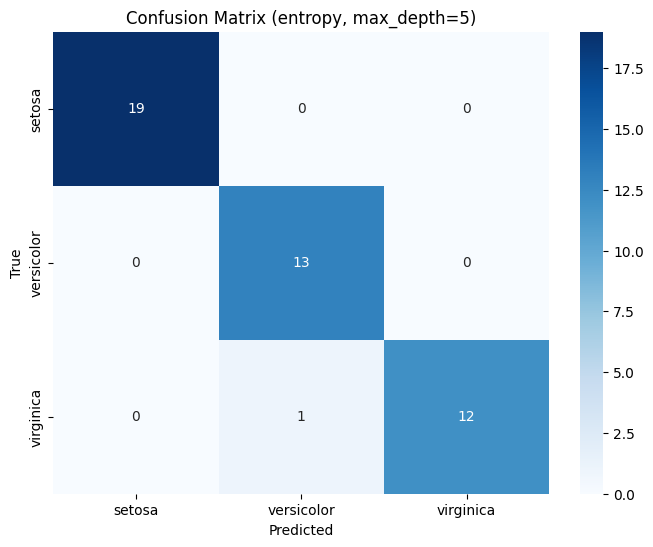

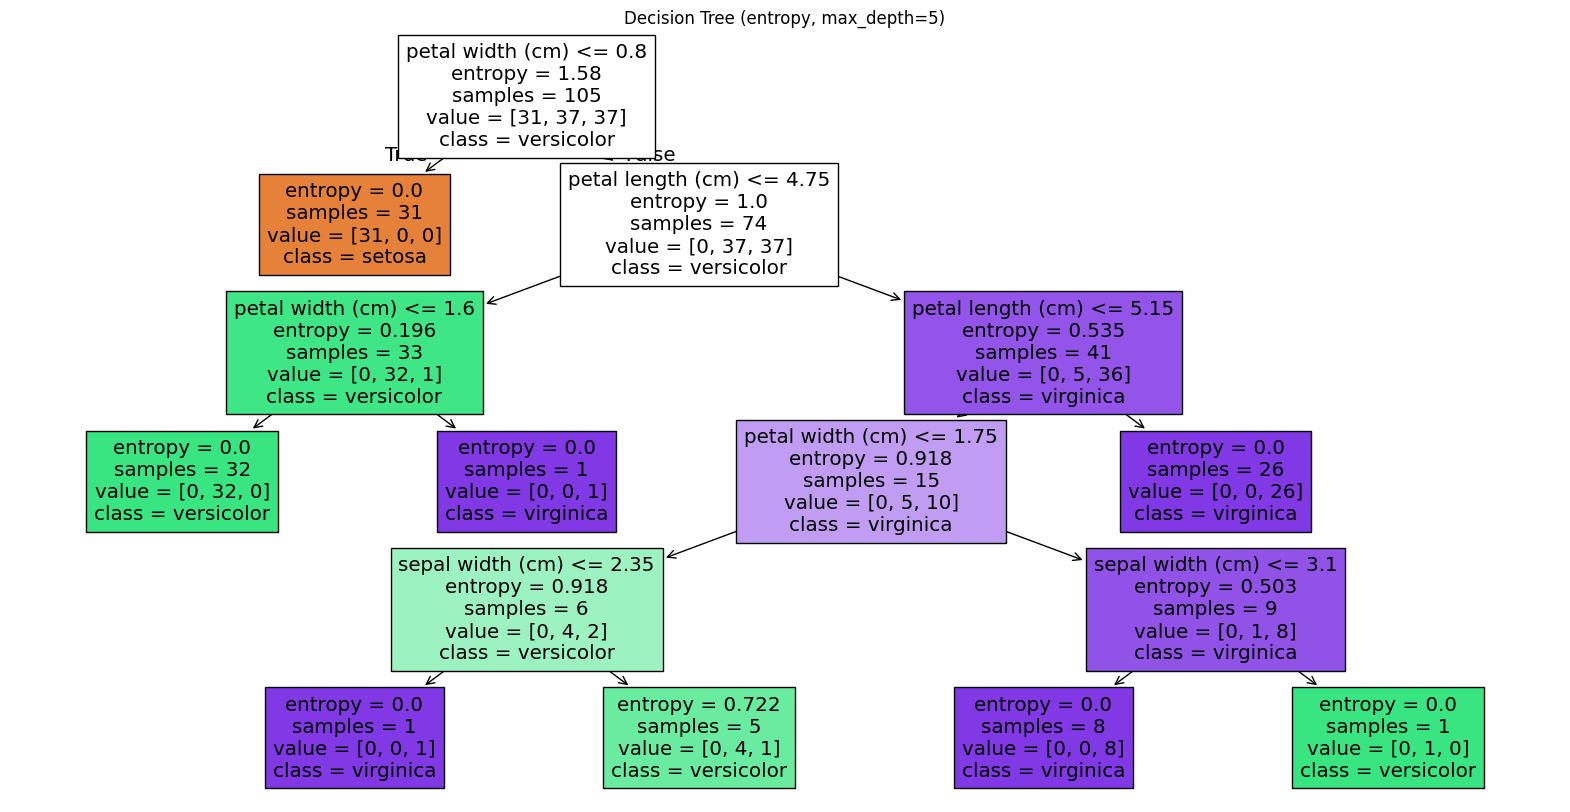

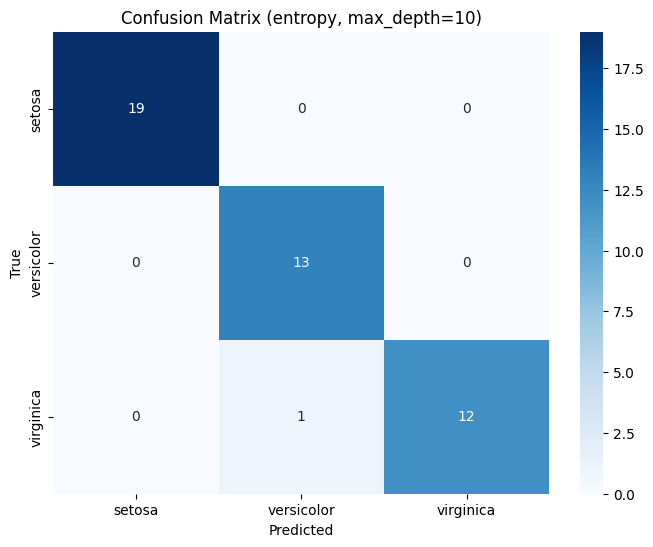

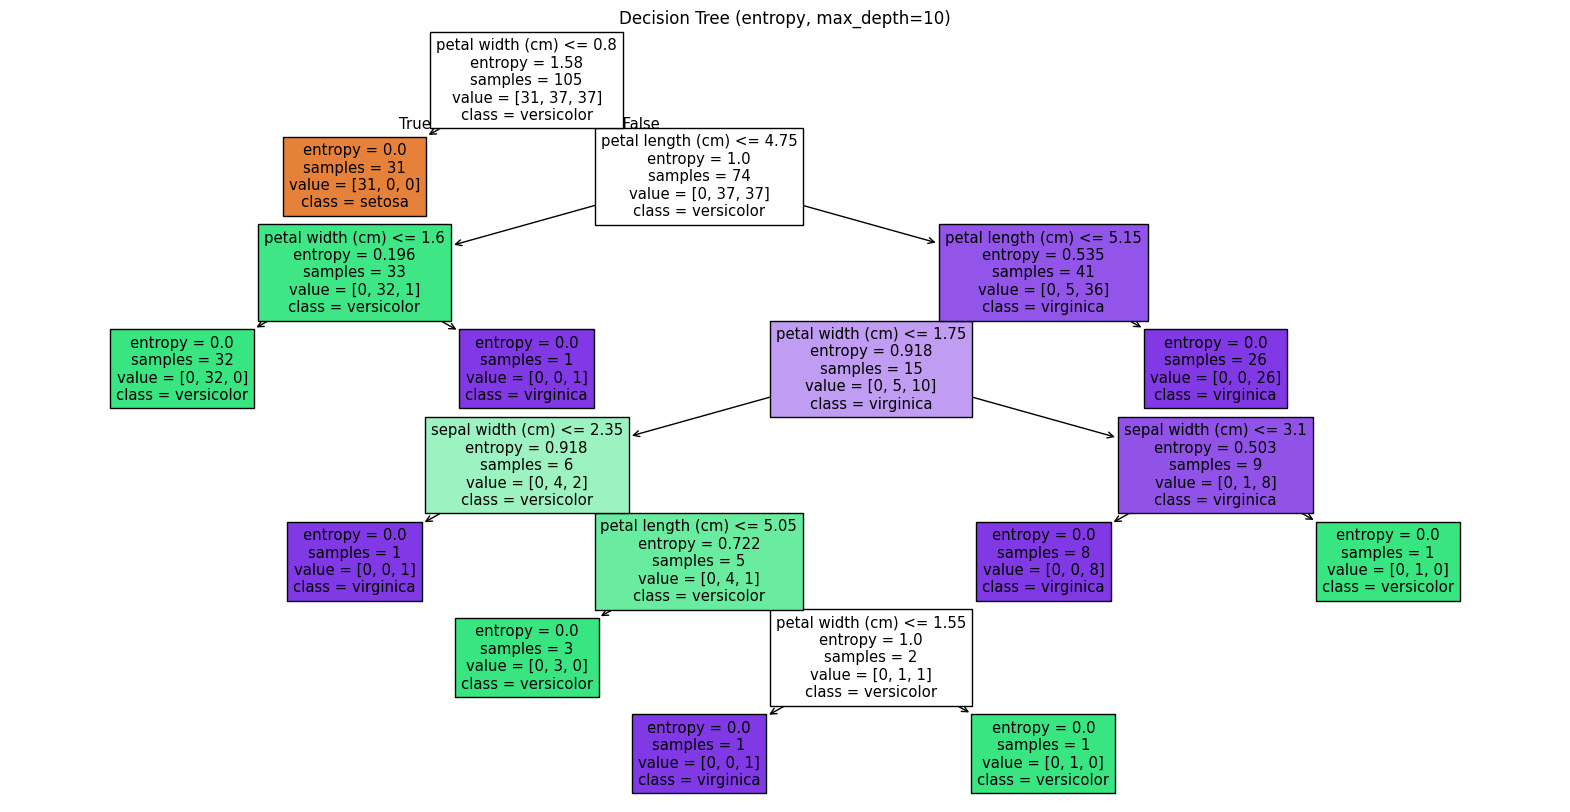

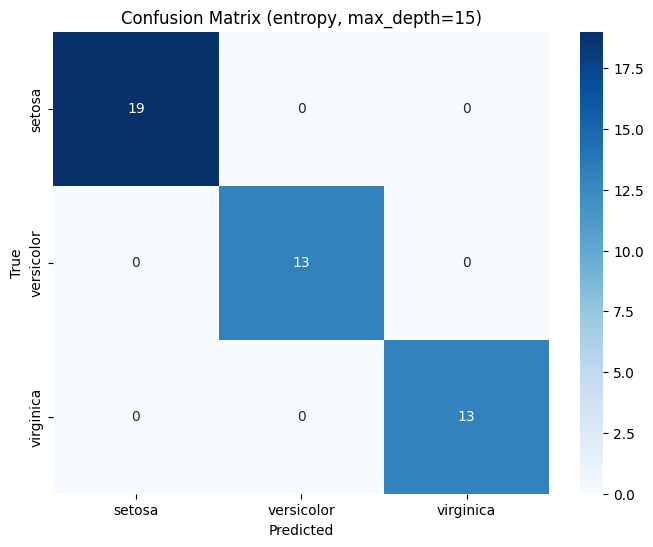

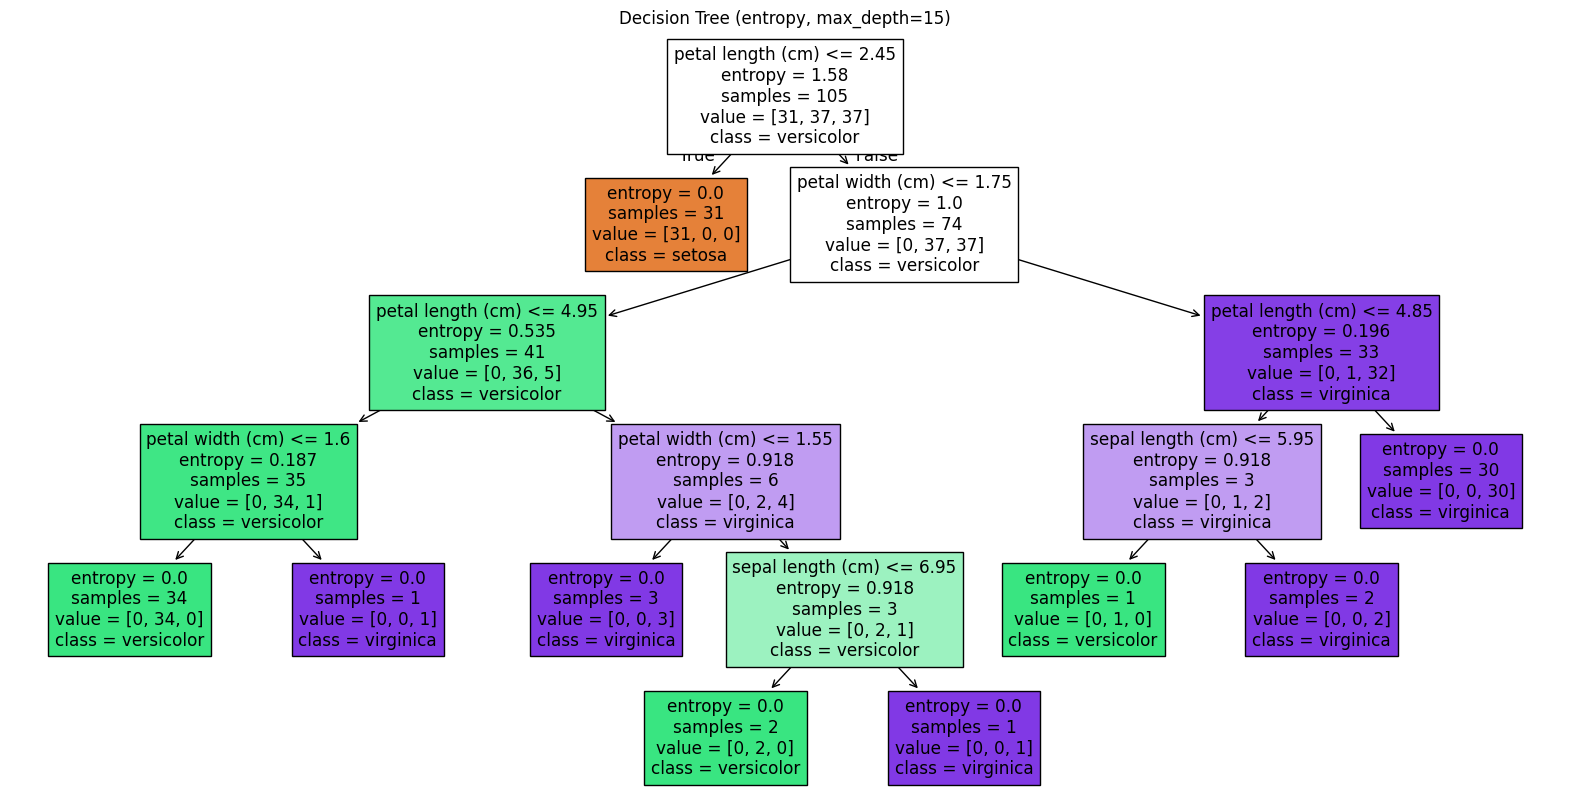

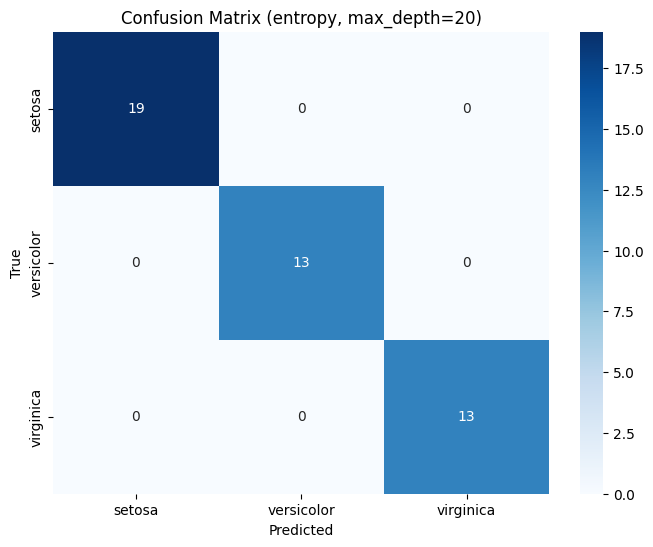

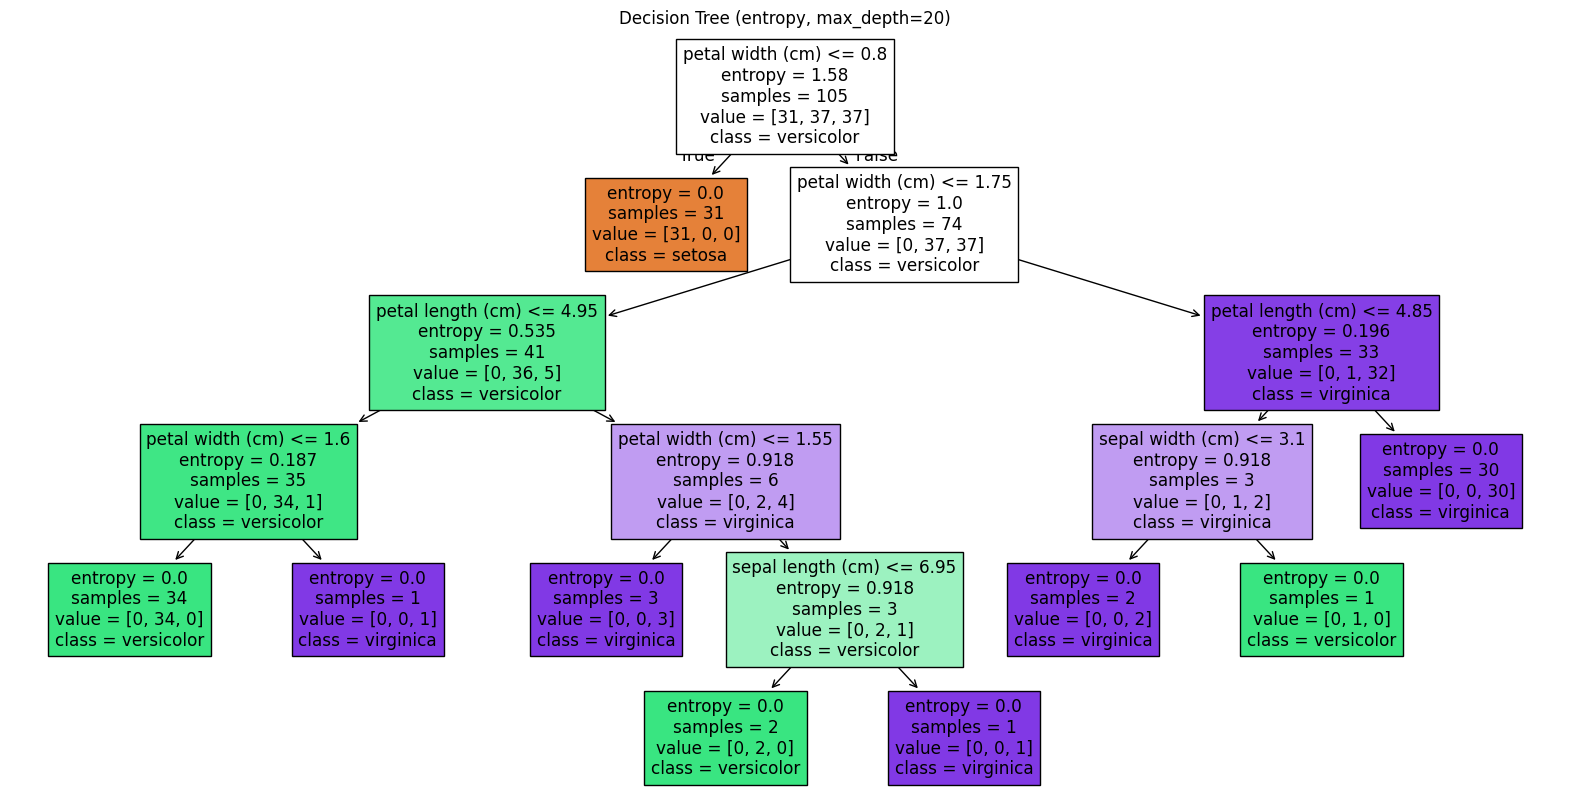

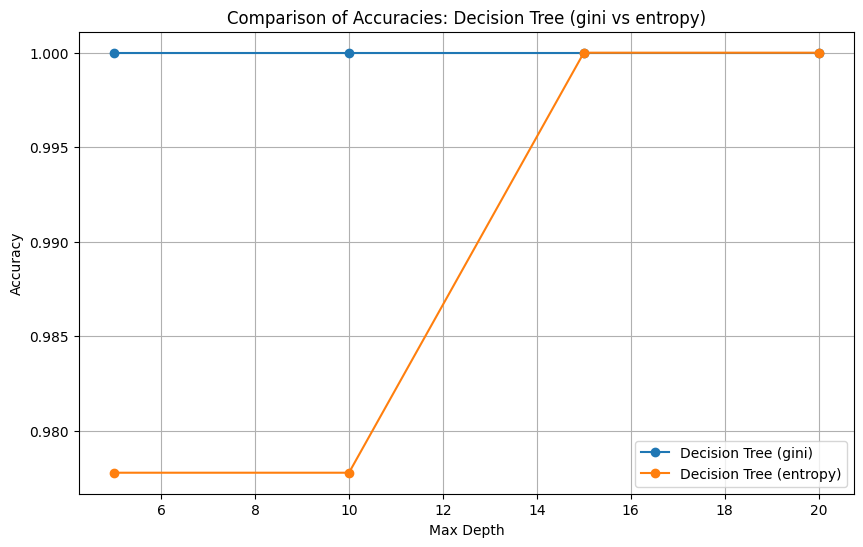

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Carregando o Iris Dataset
iris = load_iris()
X, y = iris.data, iris.target

# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Função para gerar a matriz de confusão e exibi-la como heatmap
def plot_confusion_heatmap(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Função para calcular acurácia e armazenar resultados
def model_accuracy(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Função para plotar a árvore de decisão
def plot_decision_tree(model, title):
    plt.figure(figsize=(20,10))
    plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
    plt.title(title)
    plt.show()

# Listas para armazenar resultados
depths = [5, 10, 15, 20]
accuracies_gini = []
accuracies_entropy = []

# Avaliando DecisionTreeClassifier com 'gini' e plotando a árvore
for depth in depths:
    model_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    acc_gini = model_accuracy(model_gini, X_train, y_train, X_test, y_test)
    accuracies_gini.append(acc_gini)
    plot_confusion_heatmap(model_gini, X_test, y_test, f"Confusion Matrix (gini, max_depth={depth})")
    plot_decision_tree(model_gini, f"Decision Tree (gini, max_depth={depth})")

# Avaliando DecisionTreeClassifier com 'entropy' e plotando a árvore
for depth in depths:
    model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    acc_entropy = model_accuracy(model_entropy, X_train, y_train, X_test, y_test)
    accuracies_entropy.append(acc_entropy)
    plot_confusion_heatmap(model_entropy, X_test, y_test, f"Confusion Matrix (entropy, max_depth={depth})")
    plot_decision_tree(model_entropy, f"Decision Tree (entropy, max_depth={depth})")

# Comparando acurácias em um gráfico
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies_gini, marker='o', label='Decision Tree (gini)')
plt.plot(depths, accuracies_entropy, marker='o', label='Decision Tree (entropy)')
plt.title('Comparison of Accuracies: Decision Tree (gini vs entropy)')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()